[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/analiza-dokumentow/blob/main/30--classification.ipynb)

## Klasyfikacja wg kategorii

In [1]:
import pandas as pd

In [2]:
BOOK_LINES = pd.read_pickle('var/books_lines.pkl')

In [3]:
BOOK_LINES.head()

,author,sentences_clean,words
0,Zeromski,oko oko zawiadowca stacji trebizondów wielki w...,32
1,Zeromski,zgromadzeni dokoła stołu przedstawiciele pewne...,24
2,Zeromski,urzędnicy powiatowi wtłoczeni małą kanapę zasu...,15
3,Zeromski,geometra drugiej klasy pięścią oczyma wzniesio...,24
4,Zeromski,młody doktor miejscowy czarny chudy sztalugi ż...,34


In [4]:
BOOK_LINES.head()

,author,sentences_clean,words
0,Zeromski,oko oko zawiadowca stacji trebizondów wielki w...,32
1,Zeromski,zgromadzeni dokoła stołu przedstawiciele pewne...,24
2,Zeromski,urzędnicy powiatowi wtłoczeni małą kanapę zasu...,15
3,Zeromski,geometra drugiej klasy pięścią oczyma wzniesio...,24
4,Zeromski,młody doktor miejscowy czarny chudy sztalugi ż...,34


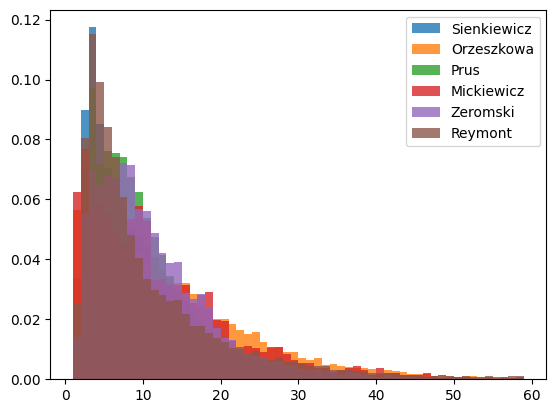

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

authors = list(set(BOOK_LINES.author))
for author in authors:
    plt.hist(BOOK_LINES[BOOK_LINES.author==author]['words'],bins=range(1,60), alpha=0.8, density=True)
plt.legend(authors)
plt.show()

$$\hat{Y} = X_{1}{\beta}_{1} + {\beta}_0 \$$
```md
$$\hat{Y} = X_{1}{\beta}_{1} + {\beta}_0 \$$
```

In [6]:
X = BOOK_LINES[['words']]
y = BOOK_LINES['author']

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (80039, 1)
Testing Data Shape:  (39423, 1)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

Pierwszy z parametrów pomaga zrównoważyć nierównomierne ilości tekstów poszczególnych autorów przypisując im wagi odwrotnie proporcjonalne do częstotliwości występowania danej klasy. Drugi pozwala na wewnętrzne wykorzystanie innego sposobu implementacji algorytmu regresji logistycznej, który jest znacznie szybszy jeśli liczba cech przewyższa ilość próbek

In [9]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.2885843151463661, 0.2947010628313421)

## Dokładnośc (accuracy): 29% 

### To nie jedyna miara i potrafi wprowadzic w błąd

Dokładnośc(accuracy) zawsze służy do pomiaru skuteczności modelu. Wyższy wskaźnik Dokładnośc, wyższa wydajność. Jednak nie zawsze tak jest, jeśli jedne dane znacznie przewyższają drugie. Przykład: 1 miliard osób bez Covid-19 przeciwko 100 osobom z Covid-19, co daje 99,9999% dokładności . W takim przypadku nie możemy twierdzić, że nasz model jest skuteczny w przewidywaniu przypadków Covid-19.

* accuracy 
* precision / recal (https://en.wikipedia.org/wiki/Precision_and_recall) 
* f1 https://en.wikipedia.org/wiki/F1_score
* sensitivity / specificity https://en.wikipedia.org/wiki/Sensitivity_and_specificity

![accuracy](https://miro.medium.com/max/507/1*i4D7Bb5SKjgaoFPxTC6pLA.png)

In [10]:
from sklearn import metrics
predicted = model.predict(X_test)
print (metrics.classification_report(y_test, predicted, digits=4))

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Mickiewicz     0.0394    0.0363    0.0378      1544
  Orzeszkowa     0.2551    0.4153    0.3160      7181
        Prus     0.2648    0.0559    0.0923      8427
     Reymont     0.1239    0.0251    0.0417      7533
 Sienkiewicz     0.3442    0.6238    0.4437     12696
    Zeromski     0.0000    0.0000    0.0000      2042

    accuracy                         0.2947     39423
   macro avg     0.1712    0.1927    0.1552     39423
weighted avg     0.2391    0.2947    0.2296     39423



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


``precision`` dla klasy A, jest to stosunek poprawnie sklasyfikowanych elementów z A (TP) do wszystkich, które nasz klasyfikator oznaczył jako A (TP+FP)
``recall`` dla klasy A, jest to stosunek poprawnie rozpoznanych elementów z A (TP) do wszystkich, które powinien rozpoznać, czyli do całej klasy A (TP+FN)

In [11]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [12]:
from sklearn import metrics
predicted = model.predict(X_test)
print(model.score(X_train, y_train))
print(metrics.classification_report(y_test, predicted, digits=4))

0.32466672497157634


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Mickiewicz     0.0000    0.0000    0.0000      1544
  Orzeszkowa     0.3251    0.0567    0.0965      7181
        Prus     0.0000    0.0000    0.0000      8427
     Reymont     0.0000    0.0000    0.0000      7533
 Sienkiewicz     0.3276    0.9850    0.4917     12696
    Zeromski     0.0000    0.0000    0.0000      2042

    accuracy                         0.3275     39423
   macro avg     0.1088    0.1736    0.0980     39423
weighted avg     0.1647    0.3275    0.1759     39423



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
BOOK_LINES[:2]

,author,sentences_clean,words
0,Zeromski,oko oko zawiadowca stacji trebizondów wielki w...,32
1,Zeromski,zgromadzeni dokoła stołu przedstawiciele pewne...,24


In [14]:
X = BOOK_LINES[['sentences_clean']]
y = BOOK_LINES['author']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() # Binary False
vectorizer.fit(X_train['sentences_clean'])

CountVectorizer()

In [18]:
vectorizer.get_feature_names_out()[:100:-1]

array(['żłób', 'żłopnąć', 'żłopał', ..., '719', '685', '682'],
      dtype=object)

In [19]:
sample = X_train.iloc[120]['sentences_clean']

In [20]:
sample

'tępiąc wszystko lepsze zrobiliśmy dobór sztuczny wypielęgnowaliśmy najgorszych'

In [21]:
vector = vectorizer.transform([sample])

In [22]:
len(vectorizer.vocabulary_)

119318

In [23]:
X_train = vectorizer.transform(X_train['sentences_clean'])
X_test = vectorizer.transform(X_test['sentences_clean'])

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [25]:
predicted = model.predict(X_test)
print(model.score(X_test, y_test))
print(metrics.classification_report(y_test, predicted, digits=4))

0.7220404332496259
              precision    recall  f1-score   support

  Mickiewicz     0.4726    0.5311    0.5002      1544
  Orzeszkowa     0.6852    0.7056    0.6953      7181
        Prus     0.7421    0.6758    0.7074      8427
     Reymont     0.7208    0.7484    0.7344      7533
 Sienkiewicz     0.8088    0.8023    0.8055     12696
    Zeromski     0.4807    0.5186    0.4989      2042

    accuracy                         0.7220     39423
   macro avg     0.6517    0.6636    0.6569     39423
weighted avg     0.7251    0.7220    0.7230     39423



In [26]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train,y_train)

predicted = model.predict(X_test)
print(model.score(X_test, y_test))
print(metrics.classification_report(y_test, predicted, digits=4))

0.714836516754179
              precision    recall  f1-score   support

  Mickiewicz     0.6413    0.4320    0.5163      1544
  Orzeszkowa     0.6964    0.6591    0.6773      7181
        Prus     0.6911    0.6900    0.6906      8427
     Reymont     0.7315    0.7172    0.7243      7533
 Sienkiewicz     0.7455    0.8433    0.7914     12696
    Zeromski     0.6006    0.4197    0.4941      2042

    accuracy                         0.7148     39423
   macro avg     0.6844    0.6269    0.6490     39423
weighted avg     0.7107    0.7148    0.7101     39423



### TF-IDF

In [27]:
X = BOOK_LINES[['sentences_clean']]
y = BOOK_LINES['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdif = TfidfVectorizer()

X = tdif.fit(X_train['sentences_clean'])

X_train = tdif.transform(X_train['sentences_clean'])
X_test = tdif.transform(X_test['sentences_clean'])

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(model.score(X_test, y_test))
print(metrics.classification_report(y_test, predicted, digits=4))


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7183877431955965
              precision    recall  f1-score   support

  Mickiewicz     0.4367    0.6049    0.5072      1544
  Orzeszkowa     0.6709    0.7379    0.7028      7181
        Prus     0.7427    0.6579    0.6977      8427
     Reymont     0.7302    0.7453    0.7377      7533
 Sienkiewicz     0.8476    0.7661    0.8048     12696
    Zeromski     0.4365    0.5896    0.5017      2042

    accuracy                         0.7184     39423
   macro avg     0.6441    0.6836    0.6586     39423
weighted avg     0.7332    0.7184    0.7231     39423



In [30]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train,y_train)

predicted = model.predict(X_test)
print(model.score(X_test, y_test))
print(metrics.classification_report(y_test, predicted, digits=4))

0.7445146234431677
              precision    recall  f1-score   support

  Mickiewicz     0.7534    0.4313    0.5486      1544
  Orzeszkowa     0.7127    0.7220    0.7173      7181
        Prus     0.7199    0.7158    0.7178      8427
     Reymont     0.7588    0.7466    0.7526      7533
 Sienkiewicz     0.7691    0.8663    0.8148     12696
    Zeromski     0.7206    0.4143    0.5261      2042

    accuracy                         0.7445     39423
   macro avg     0.7391    0.6494    0.6796     39423
weighted avg     0.7432    0.7445    0.7391     39423



### Dokładnoś 75% - 3/4 rozpoznanych zostało poprawnie zidentyfikowanych
### Precisision ~70% dla wszystkich autorów, 70% poprawnie zidentyfikowanych do wszystkich zidentyfikowanych jako ten autor
### Recal 40% poprawnie rozpoznaych Mickiewiczów do wszystkich które powinny zostac rozpoznane jako Mickiewicz

In [31]:
# from sklearn.svm import LinearSVC, SVC

# model = SVC(decision_function_shape='ovo')
# model.fit(X_train,y_train)

# predicted = model.predict(X_test)
# print(model.score(X_test, y_test))
# print(metrics.classification_report(y_test, predicted, digits=4))

In [32]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

predicted = model.predict(X_test)
print(model.score(X_test, y_test))
print(metrics.classification_report(y_test, predicted, digits=4))


0.6896989067295741
              precision    recall  f1-score   support

  Mickiewicz     0.9231    0.0078    0.0154      1544
  Orzeszkowa     0.8114    0.5807    0.6769      7181
        Prus     0.7024    0.6913    0.6968      8427
     Reymont     0.8364    0.6645    0.7406      7533
 Sienkiewicz     0.6085    0.9567    0.7439     12696
    Zeromski     0.9677    0.0147    0.0289      2042

    accuracy                         0.6897     39423
   macro avg     0.8083    0.4860    0.4838     39423
weighted avg     0.7400    0.6897    0.6554     39423



### Predict

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

X = BOOK_LINES['sentences_clean']
y = BOOK_LINES['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [38]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [43]:
model.predict([
    'Gdy się białogłowa przeciw tobie zaweźmie, choćbyś się w szparę w podłodze skrył, jeszcze cię igłą stamtąd wydłubie.',
    'Tylko głupiec chce pieniędzy i dla zrobienia milionów poświęca wszystko, życie i miłość, i prawdę, i filozofię, i wszystkie skarby człowieczeństwa, a gdy się już tak nasyci, że może pluć milionami, cóż wtedy?',
    "Natura nie stworzyła go milczącym i skrytym. Ale potem strasznie uciszyło go życie. Sto przyczyn na sto zamków zamknęło mu usta."
])

array(['Sienkiewicz', 'Reymont', 'Orzeszkowa'], dtype=object)

In [46]:
from joblib import dump, load

dump(model, open('var/my_model.joblub', 'wb+'))

In [47]:
loaded_model = load(open('var/my_model.joblub', 'rb'))

In [48]:
loaded_model.predict([
    'Gdy się białogłowa przeciw tobie zaweźmie, choćbyś się w szparę w podłodze skrył, jeszcze cię igłą stamtąd wydłubie.',
    'Tylko głupiec chce pieniędzy i dla zrobienia milionów poświęca wszystko, życie i miłość, i prawdę, i filozofię, i wszystkie skarby człowieczeństwa, a gdy się już tak nasyci, że może pluć milionami, cóż wtedy?',
    "Natura nie stworzyła go milczącym i skrytym. Ale potem strasznie uciszyło go życie. Sto przyczyn na sto zamków zamknęło mu usta."
])

array(['Sienkiewicz', 'Reymont', 'Orzeszkowa'], dtype=object)